epoch=0, loss.item()=161257439232.0
epoch=1, loss.item()=160922075136.0
epoch=2, loss.item()=146514542592.0
epoch=3, loss.item()=113313726464.0
epoch=4, loss.item()=12049310547968.0
epoch=5, loss.item()=4.334163566116261e+19
epoch=6, loss.item()=inf
epoch=7, loss.item()=nan
epoch=8, loss.item()=nan
epoch=9, loss.item()=nan
epoch=10, loss.item()=nan
epoch=11, loss.item()=nan
epoch=12, loss.item()=nan
epoch=13, loss.item()=nan
epoch=14, loss.item()=nan
epoch=15, loss.item()=nan
epoch=16, loss.item()=nan
epoch=17, loss.item()=nan
epoch=18, loss.item()=nan
epoch=19, loss.item()=nan
epoch=20, loss.item()=nan
epoch=21, loss.item()=nan
epoch=22, loss.item()=nan
epoch=23, loss.item()=nan
epoch=24, loss.item()=nan
epoch=25, loss.item()=nan
epoch=26, loss.item()=nan
epoch=27, loss.item()=nan
epoch=28, loss.item()=nan
epoch=29, loss.item()=nan
epoch=30, loss.item()=nan
epoch=31, loss.item()=nan
epoch=32, loss.item()=nan
epoch=33, loss.item()=nan
epoch=34, loss.item()=nan
epoch=35, loss.item()=nan

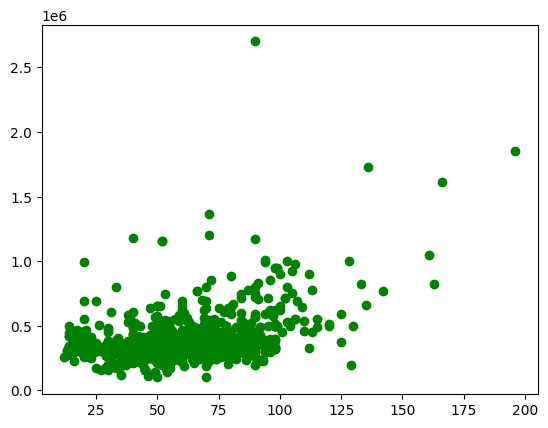

In [3]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split


class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super().__init__()
        self.linear = torch.nn.Linear(input_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.linear(x)
        y = self.linear2(x)
        return y


data = pd.read_csv("data_flats.tsv", sep="\t")
x = data["sqrMetres"].to_numpy(dtype=np.float32).reshape(-1, 1)
y = data["price"].to_numpy(dtype=np.float32).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

input_dim = 1
output_dim = 1
hidden_dim = 10
learning_rate = 0.0000001
epochs = 100

model = LinearRegression(input_dim, output_dim, hidden_dim)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.from_numpy(x_train))
    labels = torch.autograd.Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    print(f"{epoch=}, {loss.item()=}")

with torch.no_grad():
    predicted = model(torch.autograd.Variable(torch.from_numpy(x_test))).data.numpy()

print(f"{predicted=}")

plt.plot(x_train, y_train, "go")
plt.plot(x_test, predicted, "--")

plt.show()
